KNN Accuracy: 0.80


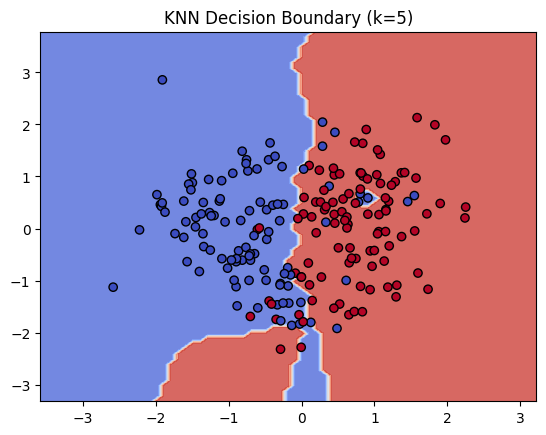

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter


class KNearestNeighbors:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
    
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
       
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_classes=2,
    n_informative=2,
    n_redundant=0,
    random_state=42
)


scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


k = 5  
knn = KNearestNeighbors(k=k)
knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)


accuracy = np.mean(y_pred == y_test)
print(f"KNN Accuracy: {accuracy:.2f}")


def plot_decision_boundary(X, y, model, k):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = np.array([model._predict(np.array([i, j])) for i, j in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
    plt.title(f"KNN Decision Boundary (k={k})")
    plt.show()

plot_decision_boundary(X, y, knn, k)
